In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# выводить все результаты вычислений в ячейках Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# <center> Закрепление знаний

In [3]:
# если файла нет и нужно его подготовить
# url = 'https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/churn.zip'
# churn_data = pd.read_csv(url, compression='zip', sep=',')
# # churn_data = pd.read_csv(url, compression='zip', index_col=[0], sep=',')
# churn_data.drop(churn_data.columns[0], axis=1, inplace=True)

# если таблица данных подготовлена к анализу
churn_data = pd.read_csv('data/churn.csv')
churn_df = churn_data.copy()
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


В таблице churn будем работать со следующими столбцами:

0. RowNumber — номер строки таблицы (это лишняя информация, можно сразу от неё избавиться)
1. CustomerId — идентификатор клиента
2. Surname — фамилия клиента
3. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
4. Geography — страна клиента (банк международный)
5. Gender — пол клиента
6. Age — возраст клиента
7. Tenure — сколько лет клиент пользуется услугами банка
8. Balance — баланс на счетах клиента в банке
9. NumOfProducts — количество услуг банка, которые приобрёл клиент
10. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
11. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
12. EstimatedSalary — предполагаемая заработная плата клиента
13. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)


Банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, 
но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. 
Иными словами, нужно **установить, чем ушедшие клиенты отличаются от лояльных 
и как между собой связаны различные признаки, определяющие клиентов**.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

## <center> Анализ данных

In [8]:
churn_df.shape

(10000, 13)

In [ ]:
churn_df.info()

In [ ]:
churn_df.describe()

In [ ]:
churn_df.describe(include=['object'])

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [6]:
# строим график
fig = px.pie(
        data_frame=churn_df,                                            # DataFrame
        names=churn_df['Exited'].map({0: 'Loyal', 1: 'Churn'}),         # от чего зависит цвет
        height=500,                                                     # высота
        width=700,                                                      # ширина
        color_discrete_sequence=['LimeGreen', 'Crimson'],               # палитра цветов
        title='Distribution of churn and loyal customers',              # заголовок
)

# выделяем сектор
fig.update_traces(pull=[0.1, 0])

#### **Выводы:**

* https://survicate.com/customer-satisfaction/customer-churn/
* https://www.cossa.ru/mytracker/282258/

Если ссылаться на источники, то цифра по банковской индустрии в US составляет, в среднем, около 20%.

По графику цифра - 20.4 %, что, в принципе, укладывается в статистику; получается, что как у всех банков, по-среднему, вроде. Банк ищет причины оттока, значит, есть повод и причины для беспокойства.

Рекомендация - уменьшать на 5-10% (до churn - 10-15%), вполне, реально. Идеально - стремиться к "вилкам" churn 0%-5%-10%.

</br>

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [19]:
# функция расчета выборки клиентской группы
def get_clients_volume(df, low, high):
    clients = df[(df['Balance'] > low) & (df['Balance'] < high)].shape[0]   # считаем сколько людей в заданной группе
    percentage = round((clients /df['Balance'].shape[0]) * 100, 2)          # вычисляем их процентное соотношение
    return clients, percentage                                              # возвращаем (сколько в группе, процент группы)

filtered = churn_df[churn_df['Balance'] > 2500].copy()                      # делаем выборку с балансом более 2500

# строим график
fig = px.box(
            data_frame=filtered,                                            # DataFrame
            x='Balance',                                                    # ось абсцисс
            orientation='h',                                                # ориентация графика
            height=400,                                                     # высота
            width=1000,                                                     # ширина
            color_discrete_sequence=['RoyalBlue'],                          # палитра цветов
            title="Balance's distribution with balance over $2.5k"          # заголовок
            )

#отображаем его
fig.show()

In [ ]:
# Формирование групп по количеству и процентному соотношению
get_clients_volume(filtered, 0, 41000)
get_clients_volume(filtered, 41000, 100000)
get_clients_volume(filtered, 100000, 119839)
get_clients_volume(filtered, 119839, 139512)
get_clients_volume(filtered, 139512, 198500)
get_clients_volume(filtered, 198500, 300000)
get_clients_volume(filtered, 0, 300000)
# filtered['Balance'].describe()

* < 41000             : 36
* 41000  <  < 100000  : 1548
* 100000 <  < 119839  : 1607
* 119839 <  < 139512  : 1596
* 139512 <  < 198500  : 1559
* \> 198500           : 37

Всего               : 6383

Всего в выборке 6383 записи (клиента), где баланс более $2500. Распределение таково, что количество клиентов делится, примерно, поровну, на 4 части (крайние группы слева и справа чрезвычайно малы 0.56% и 0.58%, ими можно пренебречь при рассмотрении выборки), то есть:
* 1 группа - 24.25 % от выборки
* 2 группа - 25.18 % от выборки
* 3 группа - 25.0  % от выборки 
* 4 группа - 24.42 % от выборки

#### **Выводы:**

Выборка, конечно, слишком идеальная, ровно плюс-минус по четвертям, выглядит, слишком равновзвешенно, с учетом 3 географических наций.

Примерно четверть клиентов, около 25% имеют средства в диапазоне от $40k до $100k, причины могут быть разные - от форс-мажоров до "просто жить ни в чем себе не отказывая".

Большинство клиентов - 75%, на балансе имеют от $100k и более (q2-q4), сильно сказывается доходность в европейских странах и менталитет, люди стараются больше откладывать средства, чем тратить их.

</br>

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [18]:
# строим график
fig = px.histogram(
    barmode='group',                                                        # тип группировки данных при выводе графика
    # data_frame=churn_df,                                                    # DataFrame
    data_frame=filtered,                                                    # DataFrame с балансом более $2.5k
    x = 'Balance',                                                          # ось абсцисс
    # color=churn_df['Exited'].map({0: 'Loyal', 1: 'Churn'}),                 # от чего зависит цвет
    color=filtered['Exited'].map({0: 'Loyal', 1: 'Churn'}),                 # от чего зависит цвет с балансом более $2.5k
    nbins=30,                                                               # число меток на оси
    height=600,                                                             # высота
    width=1000,                                                             # ширина
    marginal='box',                                                         # отображение коробочного графика
    color_discrete_sequence=['RoyalBlue', 'Crimson'],                       # палитра цветов
    title='Distribution of leftover on balance to churn and loyal clients', # заголовок
)

# отображаем его
fig.update_layout(
    yaxis = dict(
        title='Count of customers',                             # обновляем подпись к оси ординат
        visible=True,                                           # отображаем подпись
        showticklabels=True                                     # отображаем метки
        )
)

In [ ]:
# сводные таблицы для описания выводов
active = churn_df['IsActiveMember']
filtered_0 = churn_df[active == 0].copy()
filtered_1 = churn_df[active == 1].copy()

# сводная таблица зависимости минимального кредитного рейтинга от числа продуктов банка, географии ушедших клиентов
filtered_0.pivot_table(
    index=['Exited', 'Geography'],
    values=['CreditScore'],
    columns=['NumOfProducts'],
    aggfunc=['min']
)

# сводная таблица зависимости числа кредитных карт от числа продуктов банка, географии ушедших клиентов
# filtered_0.pivot_table(
#     index=['Exited', 'Geography'],
#     values=['HasCrCard'],
#     columns=['NumOfProducts'],
#     aggfunc=['count']
# )

# сводная таблица зависимости числа клиентов с активным статусом от числа продуктов банка, географии ушедших клиентов
# filtered_0.pivot_table(
#     index=['Exited', 'Geography'],
#     values=['IsActiveMember'],
#     columns=['NumOfProducts'],
#     aggfunc=['count']
# )
filtered_0.shape[0]

# сводная таблица зависимости минимального кредитного рейтинга от числа продуктов банка, географии лояльных клиентов
filtered_1.pivot_table(
    index=['Exited', 'Geography'],
    values=['CreditScore'],
    columns=['NumOfProducts'],
    aggfunc=['min']
)

# сводная таблица зависимости числа кредитных карт от числа продуктов банка, географии лояльных клиентов
# filtered_1.pivot_table(
#     index=['Exited', 'Geography'],
#     values=['HasCrCard'],
#     columns=['NumOfProducts'],
#     aggfunc=['count']
# )

# сводная таблица зависимости числа клиентов с активным статусом от числа продуктов банка, географии лояльных клиентов
# filtered_1.pivot_table(
#     index=['Exited', 'Geography'],
#     values=['IsActiveMember'],
#     columns=['NumOfProducts'],
#     aggfunc=['count']
# )
filtered_1.shape[0]

#### **Выводы:**

* По графикам заметно, что число ушедших клиентов достаточно значительное, об этом говорит первая диаграмма, более 20%, и как подтверждение - столбик ушедших более 500 человек с балансом менее $5k, это 1/4 часть ушедших клиентов.

* Основной группой ушедших, около 60% от общего числа ушедших являются держатели крупных сумм на балансе - от $100k.

* Факт оттока ещё более примечателен тем, что у ушедших клиентов граница минимального баланса располагается в районе $53k (если рассматривать срез с балансом выше $2.5k), в то время, как у оставшихся клиентов эта цифра сильно меньше - $38.5k, разница составляет - 37%.

Анализ имеющихся сведений показал, что вне зависимости от географического положения недостаточно развиты:
* "Cтатус активного клиента", его следует пересмотреть его получение, данные показывают, что клиент часто уходит не имея такого статуса, при этом число число ушедших клиентов, имеющих статус "активный клиент" и получивших услуги составляет - от 50 до 100% от объёма ушедших клиентов, получивших такое же количество услуг банка и НЕ имеющих такой статус;

* Услуги оказываемые банком, максимальное число услуг, оказанных банком, у постоянных клиентов - не более 3, у ушедших - 4. Полученные данные могут говорить о том, что оформив очередной продукт банка, клиент покидает банк, так как он может не отвечать в перспективе ожиданиям клиента. А постоянные клиенты, зная об особенностях конкретного продукта банка, не оформляют его. Также о неэффективности услуг стоит судить по цифрам ухода после получения 1 услуги - максимальный отток клиентов, 2 услуги и более - далее по убывающей, на спад.

* Кредитный рейтинг, часть данных показывает, что, ни статус активного клиента, ни число полученных услуг от банка не сказывается на поддержании высокого кредитного рейтинга. Следует пересмотреть кредитные предложения от банка.


</br>

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [17]:
# фильтры
age = churn_df['Age']
exited = churn_df['Exited']

# формирование возрастных групп
filter_exited = churn_df[(age > 35) & (age < 57) & (exited == 1)].copy()
filter_loyal = churn_df[(age > 56) & (exited == 0)].copy()

# подсчёт значений для выводов
mean_age_group_exited = filter_exited.groupby(by='Age')['Exited'].value_counts().mean()
total_age_exited = filter_exited.groupby(by='Age')['Exited'].value_counts().sum()
emissions_age_loyal = filter_loyal.groupby(by='Age')['Exited'].value_counts().sum()
# mean_age_group_exited
# total_age_exited
# emissions_age_loyal

# строим график
fig = px.histogram(
    barmode='stack',                                            # тип группировки данных при выводе графика
    data_frame=churn_df,                                        # DataFrame
    x = 'Age',                                                  # ось абсцисс
    y = 'Exited',                                               # ось ординат
    color=churn_df['Exited'].map({0: 'Loyal', 1: 'Churn'}),     # от чего зависит цвет
    orientation='v',                                            # ориентация графика
    height=600,                                                 # высота
    width=1000,                                                 # ширина
    histfunc='count',                                           # агрегирующая функция
    marginal='box',                                             # отображение коробочного графика
    color_discrete_sequence=['Crimson', 'RoyalBlue'],           # палитра цветов
    title='Age distribution to churn and loyal clients',        # заголовок
)

# отображаем его
fig.update_layout(
    yaxis = dict(
        title='Count of customers',                             # обновляем подпись к оси ординат
        )
)

#### **Выводы:**

Проанализировав график видно, что:
* Стоит обратить внимание на возрастную категорию 35-55 лет. 

<p style="margin-left: 40px">Именно это основная масса клиентов уходящей группы, среднее число клиентов на каждую возрастную группу в указанной "вилке" - почти 70 человек (68.86 человека на группу), суммарно почти 1450 (точно - 1446) человек. </p>

* Особо стоит обратить внимание на возрастную категорию лояльных клиентов, в правой части очень большое число выбросов, верхняя граница основной массы постоянных клиентов 56 лет достаточно близко к верхней границе "коробки ушедших клиентов" - 51 год. 

<p style="margin-left: 40px">Отток может составить почти 500 человек (точно - 486), если банк не предпримет меры. </p>

</br>

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [16]:
# выборка 
salary_score_df = churn_df.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()

# строим график
fig = px.scatter(
    data_frame = salary_score_df,                                       # DataFrame
    x='EstimatedSalary',                                                # ось абсцисс
    y='CreditScore',                                                    # ось ординат
    color=salary_score_df['Exited'].map({0: 'Loyal', 1: 'Churn'}),      # от чего зависит цвет
    height=500,                                                         # высота
    width=1000,                                                         # ширина
    color_discrete_sequence=['RoyalBlue', 'Crimson'],                   # палитра цветов
    title='Dependence of the credit rating on the estimated salary',    # заголовок
)

# отображаем его
fig.update_layout(
    xaxis = dict(
        title='Estimated salary',                                       # обновляем подпись к оси абсцисс
        ),
    yaxis = dict(
        title='Credit score',                                           # обновляем подпись к оси ординат
        )
)

#### **Выводы:**

На представленной диаграмме точки разбросаны хаотично и не сгруппированы в какой-то конкретной области диаграммы, это означает только одно - отсутствие взаимосвязей между предполагаемой заработной платой и кредитным рейтингом. Зависимость признака оттока от двух этих признаков также определить невозможно.

</br>

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [15]:
# строим график
fig = px.sunburst(
    churn_df,                                                   # DataFrame
    names=churn_df['Exited'].map({0: 'Loyal', 1: 'Churn'}),     # от чего зависит цвет
    path=['Gender', 'Exited'],                                  # выбор данных для построения "солнца"
    height=600,                                                 # высота
    width=800,                                                  # ширина
    color_discrete_sequence=['RoyalBlue', 'DeepPink'],          # палитра цветов
    title='Gender distribution to churn and loyal customers',   # заголовок
)

fig.data[0].insidetextorientation='horizontal'                  # горизонтальное расположение надписей в секторах
fig.data[0].hovertemplate = '%{label}<br>%{value}'              # формирование подписей в контекстной подсказке
fig.data[0].texttemplate = '%{label}<br>%{percentEntry:.2%}'    # формирование формата вывода

# формирование меток в секторах
fig.update_traces(labels=('Loyal', 'Loyal', 'Churn', 'Churn', 'Female', 'Male'), selector=dict(type='sunburst'))

#### **Выводы:**

По графику видно и следует, что:
* Доля ушедших "мужчин" (Male, 1) - 8,98%
* Доля ушедших "женщин" (Female, 1) - 11,39%

<p style="margin-left: 40px">Бóльшая часть клиентов, прекращающих пользоваться услугами банка и покидающих банк - женщины. </p>

</br>

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [14]:
# выборка
bar_data = churn_df.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['Exited'].value_counts().copy()

# строим график
fig = px.bar(
    data_frame=bar_data,                                        # DataFrame
    x = 'NumOfProducts',                                        # ось абсцисс
    y = 'count',                                                # ось ординат
    color=bar_data['Exited'].map({0: 'Loyal', 1: 'Churn'}),     # от чего зависит цвет
    orientation='v',                                            # ориентация графика
    height=400,                                                 # высота
    width=800,                                                  # ширина
    color_discrete_sequence=['RoyalBlue', 'Crimson'],           # палитра цветов
    # заголовок
    title="Distribution of received bank's products to churn and loyal customers",
)

# отображаем его
fig.update_layout(
    xaxis = dict(
        dtick = 1,                                              # формирование меток
        title='Number of products',                             # обновляем подпись к оси абсцисс
        ),
    yaxis = dict(
        title='Count of customers',                             # обновляем подпись к оси ординат
        visible=True,                                           # отображаем подпись
        showticklabels=True                                     # отображаем метки
        )
)

#### **Выводы:**

* Максимальное число услуг оказанных банком у постоянных клиентов - не более 3, у ушедших - 4.

* Независимо от числа полученных услуг от банка присутствует отток, он минимален когда оказанное банком клиенту число услуг максимально, но и лояльных клиентов нет. Возможно, постоянные клиенты, знают об особенностях конкретного продукта банка и не оформляют его, имеет "подводные камни", или "последняя услуга не интересна" - не отвечает ожиданиям,  или произошло, так называемое "насыщение" - то есть клиенту более услуги не требуются;

* Максимальный отток начиная с получения хотя бы 1 услуги, далее - по убывающей, то есть, банк предлагая дополнительные услуги клиенту, увеличивает лояльность, уменьшая отток. При этом после получения второй услуги отток уменьшается более, чем в 4 раза.

</br>

 ### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [87]:
# выборка
bar_data = churn_df.groupby(by=['Tenure', 'Exited'], as_index=False)[['IsActiveMember', 'Exited']].value_counts().copy()

# строим график
fig_1 = px.histogram(
    barmode='group',                                            # тип группировки данных при выводе графика
    data_frame=bar_data,                                        # DataFrame
    x = 'IsActiveMember',                                       # ось абсцисс
    y = 'count',                                                # ось ординат
    color=bar_data['Exited'].map({0: 'Loyal', 1: 'Churn'}),     # от чего зависит цвет
    height=400,                                                 # высота
    width=800,                                                  # ширина
    color_discrete_sequence=['RoyalBlue', 'Crimson'],           # палитра цветов
    title='Distribution by status to churn and loyal customers' # заголовок
)

# отображаем его
fig_1.update_layout(
    xaxis = dict(
        dtick = 1,                                              # формирование меток
        title='Active membership',                              # обновляем подпись к оси абсцисс
        ),
    yaxis = dict(
        title='Count of customers',                             # обновляем подпись к оси ординат
        visible=True,                                           # отображаем подпись
        showticklabels=True                                     # отображаем метки
        )
)

# строим график 2
fig_2= px.histogram(
    barmode='group',                                            # тип группировки данных при выводе графика
    data_frame=bar_data,                                        # DataFrame
    x = 'Tenure',                                               # ось абсцисс
    y = 'count',                                                # ось ординат
    # от чего зависит цвет
    color=bar_data['IsActiveMember'].map({0: 'non-Active', 1: 'Active'}),
    color_discrete_sequence=['LimeGreen', 'Crimson'],           # палитра цветов
    nbins=11,                                                   # число меток
    height=500,                                                 # высота
    width=800,                                                  # ширина
    title='Distribution by tenure and status to customers'      # заголовок
)

# отображаем его
fig_2.update_layout(
    bargap=0.2,                                                 # расстояние между группами баров
    bargroupgap=0.1,                                            # расстояние баров в группе
    yaxis = dict(
        title='Count of customers',                             # обновляем подпись к оси ординат
        visible=True,                                           # отображаем подпись
        showticklabels=True                                     # отображаем метки
        )
)

#### **Выводы:**

* По наблюдениям из 1-го графика видно, что клиенты в статусе "неактивного" имеют отток почти на 80% больше в общем исчислении за весь временной период.

<p style="margin-left: 40px">Из 1-го графика также видно, что число постоянных клиентов со статусом "активный клиент" больше, чем без него, то есть это свидетельствует о том, что статус "активный клиент" следует развивать и дальше."</p>

* По наблюдениям из 2-го графика видно, что утечка клиентов на второй год почти достигает разницы в 2,5 раза. Есть просадка по оттоку клиентов на 6 год присутствия клиентов в банке до уровня оттока на 2 году присутствия, но затем отток вновь нарастает.

<p style="margin-left: 40px">Также, из 2-го графика видно, что число клиентов с "активным статусом" уменьшается не смотря на его наличие, это говорит, о том, что есть дополнительные факторы влияющие на отток клиентов в банке.</p>

Получение статуса "активного клиента" следует пересмотреть как по срокам, так и по условиям получения такого статуса, данные показывают, что клиент часто уходит не имея такой привилегии и тенденция с каждым годом нарастает.

</br>

 ### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [20]:
# выборка
country = churn_df.groupby(['Geography'], as_index=False).mean(numeric_only=True).copy()
# country

# строим график
fig = px.choropleth(
    data_frame=country,                         # DataFrame
    locations='Geography',                      # столбец с локациями
    locationmode = "country names",             # режим сопоставления локаций с базой Plotly
    color='Exited',                             # от чего зависит цвет
    hover_name='Geography',                     # выделение региона в контекстной подсказке
    range_color=[0, 0.5],                       # диапазон цвета
    title='Volume of churn customers',          # заголовок
    width=800,                                  # ширина
    height=500,                                 # высота
    color_continuous_scale='Reds',              # палитра цветов
)

#отображаем график
fig.show()

#### **Выводы:**

* Среднее значение числа полученных услуг от банка ниже, чем в остальных странах. 

* Среднее значение числа статуса "активного клиента банка" также ниже, чем в остальных странах. 

Как уже было ранее отмечено, существует необходимость и потребность в пересмотре существующих услуг банка, выведение неактуальных, введение новых; получение статуса "активного клиента" также следует пересмотреть как по срокам, так и по условиям.

</br>

 ### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

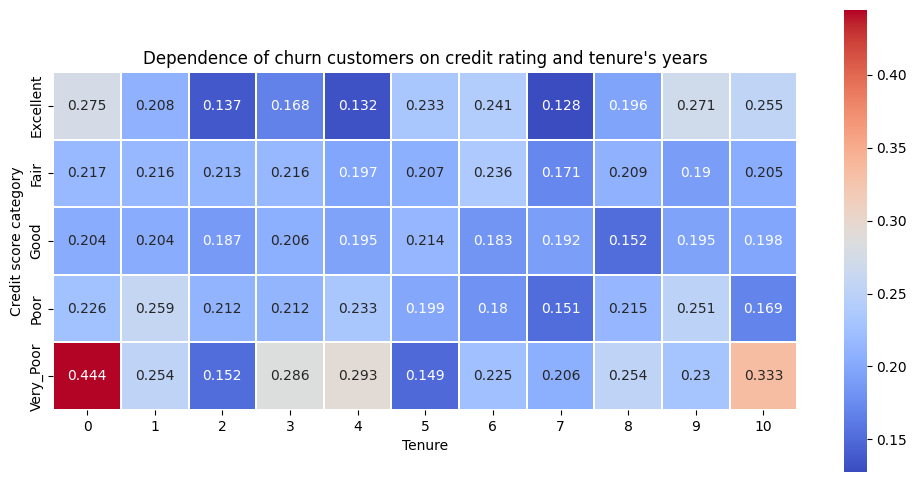

In [5]:
# функция перевода числового признака 'CreditScore' в категориальный
def get_credit_score_rate(credit_sc):
    if credit_sc < 300:
        return "Deep"
    elif credit_sc >= 300 and credit_sc < 500:
        return "Very_Poor"
    elif credit_sc >= 500 and credit_sc < 601:
        return "Poor"
    elif credit_sc >= 601 and credit_sc < 661:
        return "Fair"
    elif credit_sc >= 661 and credit_sc < 781:
        return "Good"
    elif credit_sc >= 781 and credit_sc < 851:
        return "Excellent"
    elif credit_sc >= 851:
        return "Top"

# формирование сводной таблицы и нового признака 'CreditScoreCat'
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_rate)
pivot = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
).copy()

# подсчёт значений для выводов
# display(pivot.mean(axis=1))

# строим график
fig = plt.figure(figsize=(12, 6))                   # задаем размер полотна
ax = sns.heatmap(
    data=pivot,                                     # DataFrame
    annot=True,                                     # отображение значений (аннотаций) в ячейках диаграммы
    fmt='.3g',                                      # формирование формата вывода
    cmap='coolwarm',                                # палитра цветов
    linewidths=0.1,                                 # отображение разделителей между ячейками диаграммы
    square=True                                     # выводить ячейки диаграммы квадратными
)

ax.set_ylabel('Credit score category')              # обновляем подпись к оси ординат

# заголовок
ax.set_title("Dependence of churn customers on credit rating and tenure's years");

#### **Выводы:**

Принимая, условно, за 0.25 и выше - пороговое значение для клиентов, к которым следует присмотреться:

* Клиенты с самым низким кредитным рейтингом. В 6 группах из 10 уходят;

* Клиенты с самым высоким кредитным рейтингом. В 3 группах из 10 уходят;

* Есть видимая связь по просадкам кредитного рейтинга (график 2 из п.9.8) в нулевой и первый год сотрудничества и 5-6 год сотрудничества;

* Ко всем клиентам, особенно, в нулевой и первый год сотрудничества, когда еще клиент пытается наработать кредитный рейтинг, и 9-10 год сотрудничества, когда клиент за такое долгое время сотрудничества кредитный рейтинг поднимать уже не собирается и уходит, следует обратить тщательное внимание.

Рекомендация - пересмотр кредитных программ и условий по программам кредитования, как для новых клиентов, так и для постоянных клиентов, "со стажем обслуживания" в банке.